In [152]:
x1, x2, w1, w2, b = 4, 1, 2, 9, -22

x1*w1 + x2*w2 + b >= 0

False

In [153]:
import numpy as np

def perceptron(X, W, b):
    return np.matmul(X, W) + b 

X = [4, 1]
W = [2, 9]
b = -22

pi = 3.14
perceptron(X, W, b)


-5

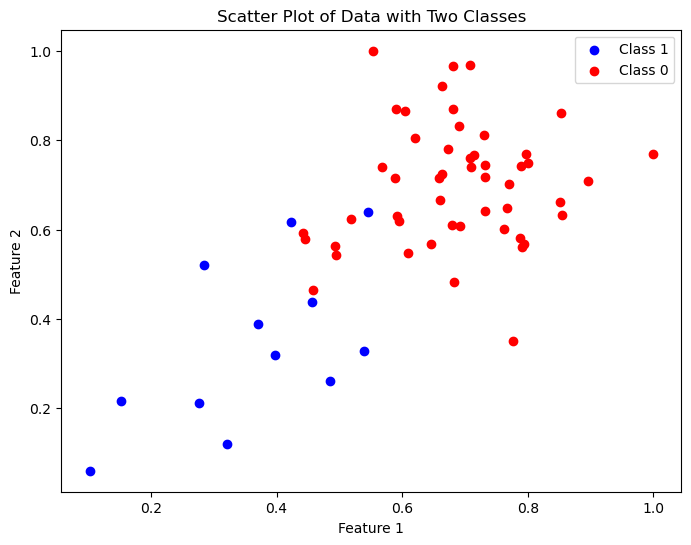

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data from Excel file without headers
data = pd.read_excel(r"data.xlsx", header=None)

# Extract features and labels using descriptive names
features = np.array([data[0], data[1]])
labels = np.array(data[2])

# Create the scatter plot with clear labels and a title
plt.figure(figsize=(8, 6))  # Adjust figure size for better visualization

plt.scatter(features[0][labels == 1], features[1][labels == 1],
            color='blue', label='Class 1')
plt.scatter(features[0][labels == 0], features[1][labels == 0],
            color='red', label='Class 0')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Data with Two Classes')
plt.legend()  # Show the legend for class distinction

plt.show()


In [155]:
import numpy as np  # Explicitly import NumPy
import matplotlib.pyplot as plt  # Import for plotting

def make_prediction(input_data, weights, bias):
    """Predicts the class (0 or 1) based on the perceptron model."""
    weighted_sum = np.dot(input_data, weights) + bias
    return weighted_sum >= 0  # True for class 1, False for class 0

In [156]:
def update_perceptron_parameters(data, labels, weights, bias, learning_rate):
    """Updates weights and bias based on a single training step."""
    for i in range(len(data)):
        predicted_class = make_prediction(data[i], weights, bias)

        if labels[i] - predicted_class == 1:
            weights += learning_rate * data[i][:, np.newaxis]  # Ensure weights update as a 2D array
            bias += learning_rate
        elif labels[i] - predicted_class == -1:
            weights -= learning_rate * data[i][:, np.newaxis]  # Ensure weights update as a 2D array
            bias -= learning_rate

    return weights, bias


In [159]:
def train_perceptron(data, labels, learning_rate, num_epochs):
    """Trains the perceptron model for multiple epochs."""
    weights = np.random.rand(2, 1)  # Initialize weights randomly
    bias = 2  # Initialize bias
    decision_boundaries = []

    for epoch in range(num_epochs):
        slope, intercept = -weights[0] / weights[1], -bias / weights[1]
        decision_boundaries.append((slope, intercept))

        weights, bias = update_perceptron_parameters(data, labels, weights, bias, learning_rate)

    return decision_boundaries

# Train the perceptron model
decision_boundaries = train_perceptron(features.T, labels, learning_rate=0.1, num_epochs=10)

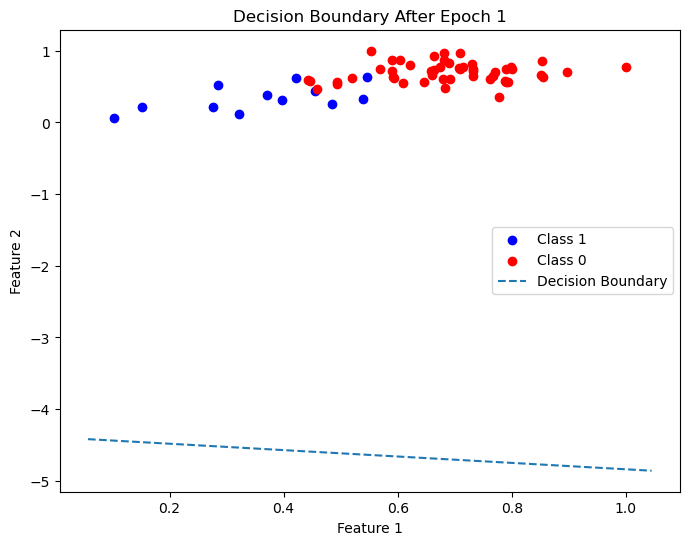

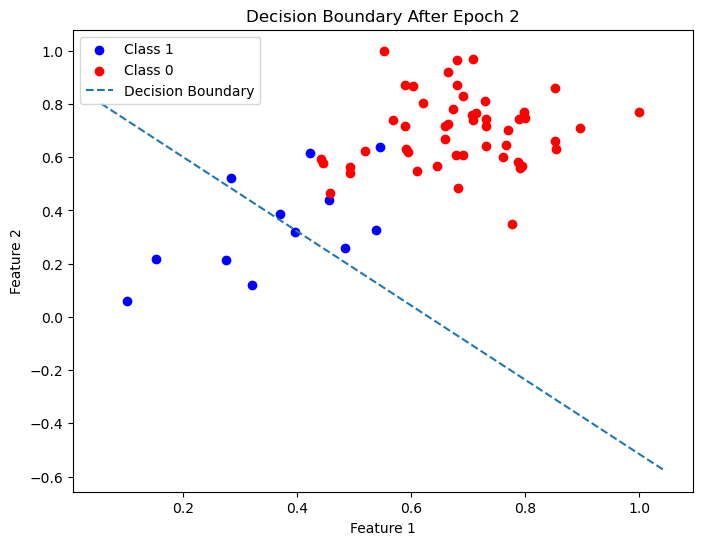

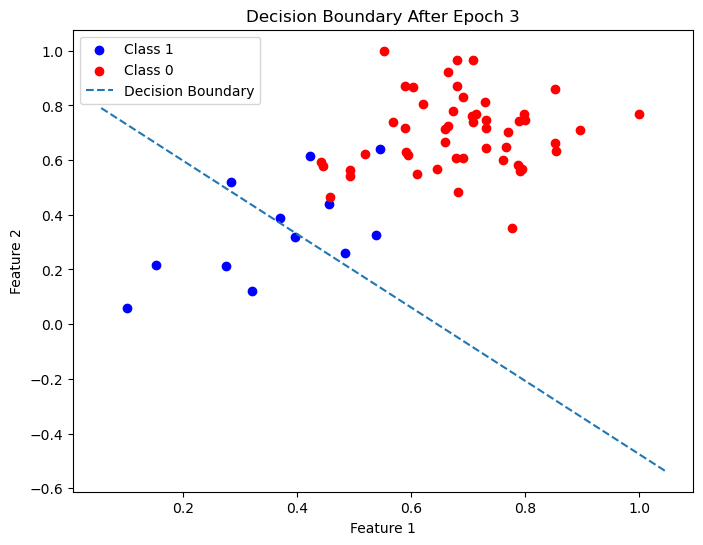

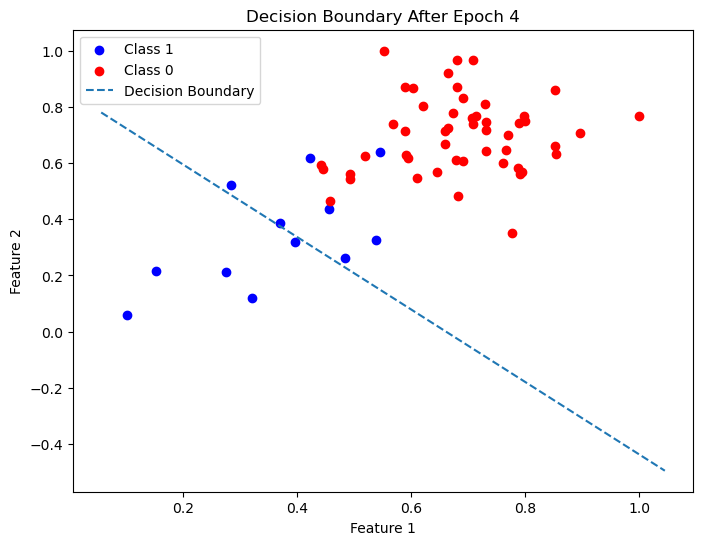

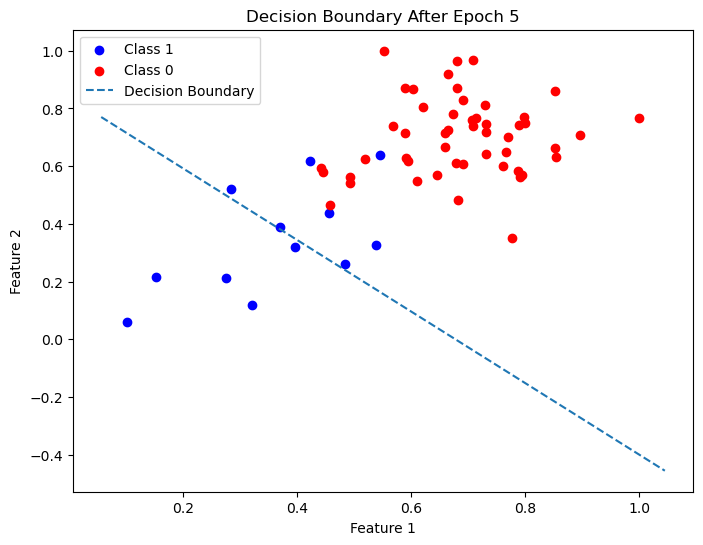

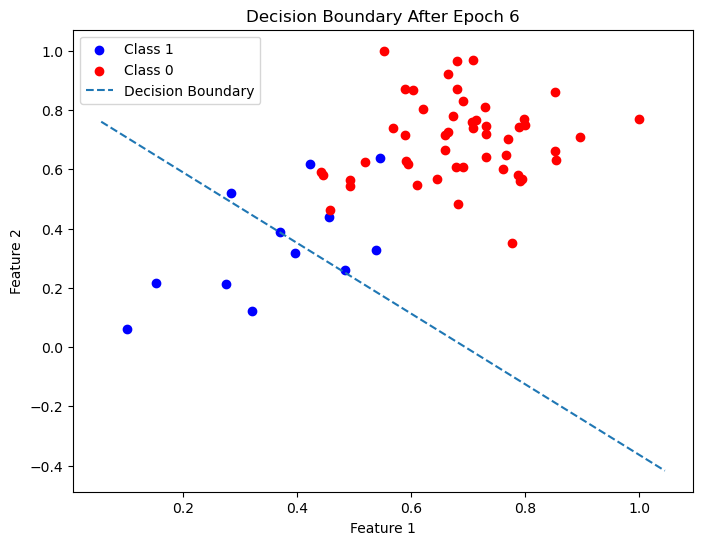

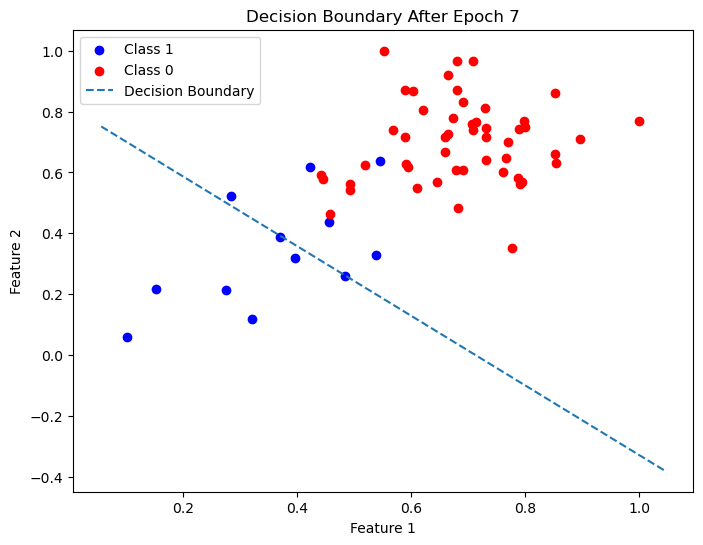

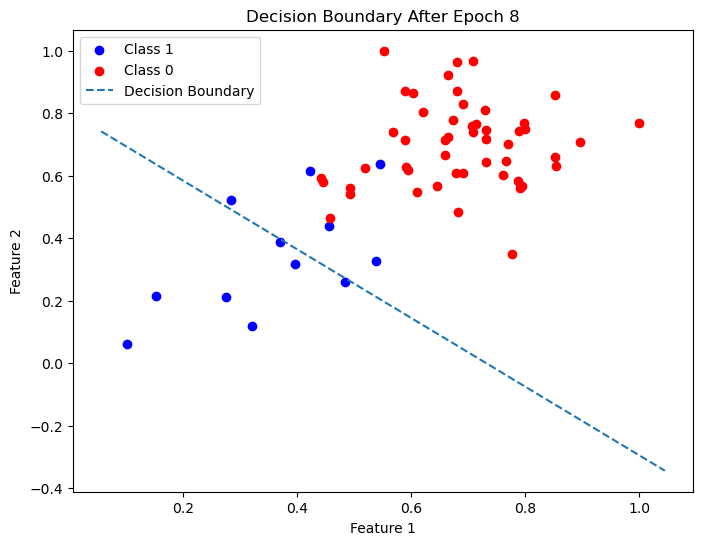

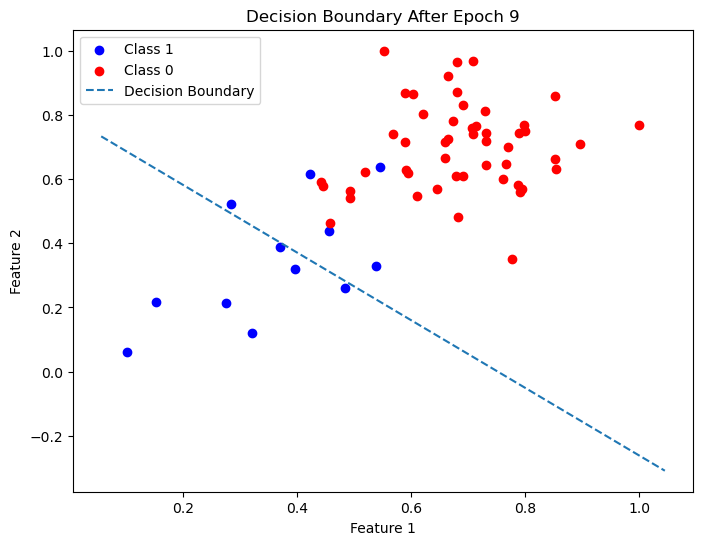

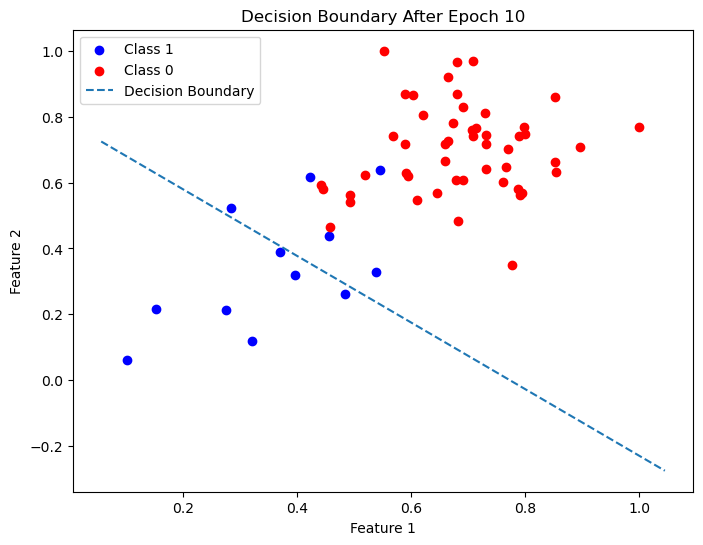

In [160]:
import matplotlib.pyplot as plt

# Train the perceptron model
decision_boundaries = train_perceptron(features.T, labels, learning_rate=0.1, num_epochs=10)

# Function to plot a decision boundary
def plot_decision_boundary(slope, intercept):
    """Plots a line representing the decision boundary."""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', label='Decision Boundary')

# Visualize the decision boundaries over epochs
for epoch in range(len(decision_boundaries)):
    slope, intercept = decision_boundaries[epoch]

    plt.figure(figsize=(8, 6))  # Adjust figure size for better visualization

    plt.scatter(features[0][labels == 1], features[1][labels == 1],
                color='blue', label='Class 1')
    plt.scatter(features[0][labels == 0], features[1][labels == 0],
                color='red', label='Class 0')

    plot_decision_boundary(slope, intercept)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Boundary After Epoch {epoch + 1}')
    plt.legend()
    plt.show()


##### Softmax function

In [ ]:
import numpy as np

def softmax(L):
    exps = np.exp(L)
    sumOfExps = sum(exps)

    result = []
    for i in range(len(exps)):
        result.append(exps[i]/sumOfExps)
    return result
    
softmax([2,1,0])

[0.6652409557748219, 0.24472847105479764, 0.09003057317038046]

In [ ]:
def crossEntropy(y, output):
    return -y * np.log(output) - (1-y) * np.log(1-output)

crossEntropy(1, 0.1) #it means our original label was 1 and our prediction says that we are 0.1% sure that it should be 1 which means we are less sure. That means the cross entropy will be higher

2.3025850929940455

In [ ]:
crossEntropy(1, 0.9)

0.10536051565782628

In [ ]:
def sigmoid(x):
    return 1/1+np.exp(-x)

def outputFormula(X, w, bias):
    return sigmoid(np.dot(X, w) + bias)

### Logistic Regression

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'green', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

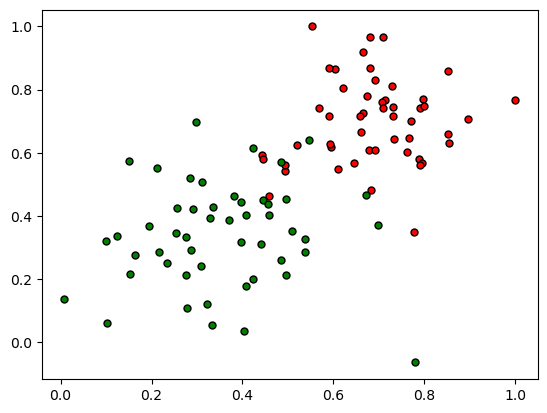

In [ ]:
data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

In [ ]:
import numpy as np

def error_formula(y, output):
    return -y*np.log(output) - (1-y) * np.log(1-output)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def outputFormula(x, W, bias):
    return sigmoid(np.dot(x,W)+bias)

def update_weights(x, y, weights, bias, lr):
    output = outputFormula(x, weights, bias)
    d_error = y - output
    weights += lr * d_error * x
    bias += lr * d_error
    return weights, bias

In [ ]:
np.random.seed(44)
epochs = 400
lr = 0.001

def train(features, targets, epochs, lr):
    errors = []
    n_records, n_features = features.shape
    
    weights = np.random.normal(size = n_features)
    bias = 0
    
    for e in range(epochs):
        for x, y in zip(features, targets):
            output = outputFormula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, lr)
            
        out = outputFormula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        
        if e % (epochs/10) == 0:
            print("\n ========Epoch",e,"=========")
            print("Train Loss", loss)
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
            
            display(-weights[0]/weights[1], -bias/weights[1])
            
            
    #Solution Boudary
    plt.title("Solution Boudary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')
    
    plot_points(features, targets)
    plt.show()
    
    
    #Plotting the error
    plt.title("Error Plot")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Error")
    plt.plot(errors)
    plt.show()


 ========Epoch 0 =========
Train Loss 0.7629781006873365
Accuracy:  0.39



 ========Epoch 40 =========
Train Loss 0.6900271302025912
Accuracy:  0.54

 ========Epoch 80 =========
Train Loss 0.6531706581680742
Accuracy:  0.65

 ========Epoch 120 =========
Train Loss 0.6209598426349952
Accuracy:  0.72

 ========Epoch 160 =========
Train Loss 0.5918666784317981
Accuracy:  0.77

 ========Epoch 200 =========
Train Loss 0.5655487934084431
Accuracy:  0.82

 ========Epoch 240 =========
Train Loss 0.5417082210982661
Accuracy:  0.84

 ========Epoch 280 =========
Train Loss 0.5200698461273823
Accuracy:  0.85

 ========Epoch 320 =========
Train Loss 0.5003860942413646
Accuracy:  0.9

 ========Epoch 360 =========
Train Loss 0.48243699822656927
Accuracy:  0.89


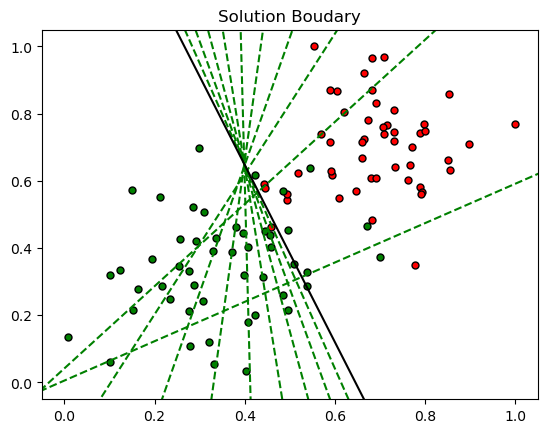

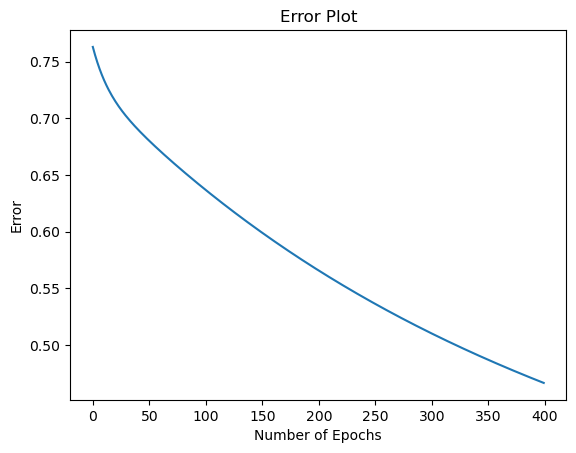

In [ ]:
train(X, y, epochs, lr)

### Neural Network

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('student_data.csv')

data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


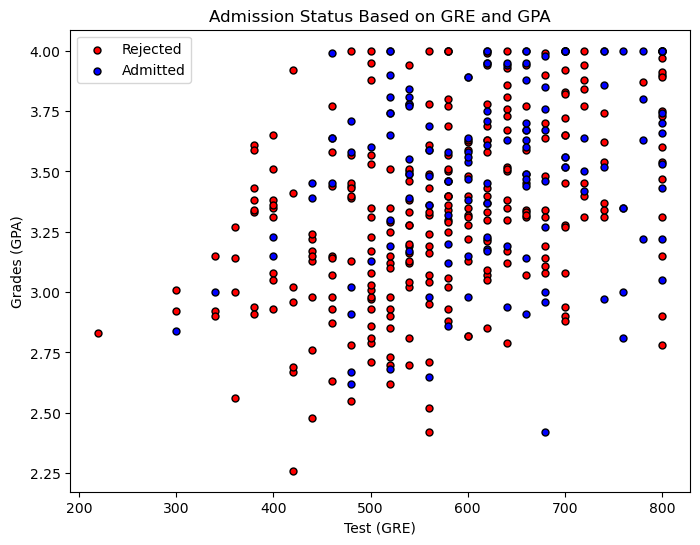

In [ ]:
import matplotlib.pyplot as plt
import numpy as np  # Explicitly import NumPy

def plot_points(data):
    """Plots admitted and rejected data points based on GRE scores and GPA."""

    # Extract features and labels
    features = data[["gre", "gpa"]].to_numpy()  # Use to_numpy() for clarity
    labels = data["admit"].to_numpy()

    # Separate admitted and rejected data points
    admitted_points = features[labels == 1]
    rejected_points = features[labels == 0]

    # Create the scatter plot
    plt.figure(figsize=(8, 6))  # Set figure size for better visualization

    plt.scatter(rejected_points[:, 0], rejected_points[:, 1],
                s=25, color='red', edgecolor='k', label='Rejected')
    plt.scatter(admitted_points[:, 0], admitted_points[:, 1],
                s=25, color='blue', edgecolor='k', label='Admitted')

    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')
    plt.title('Admission Status Based on GRE and GPA')  # Add a descriptive title
    plt.legend()  # Show the legend

    plt.show()
    

# Example usage
plot_points(data)


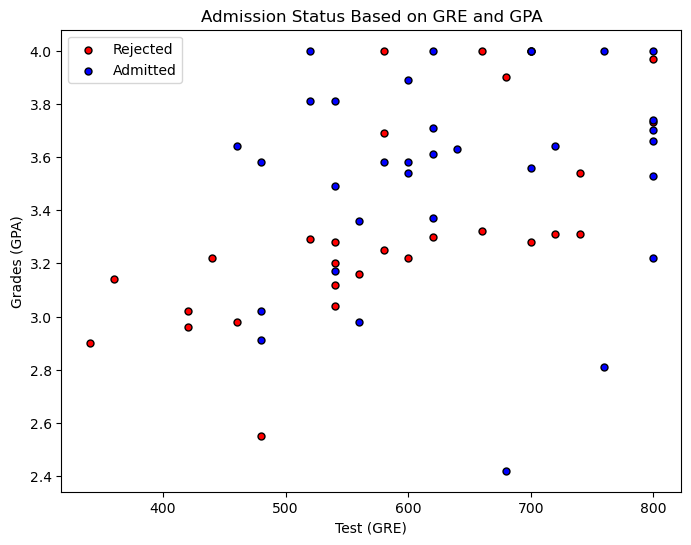

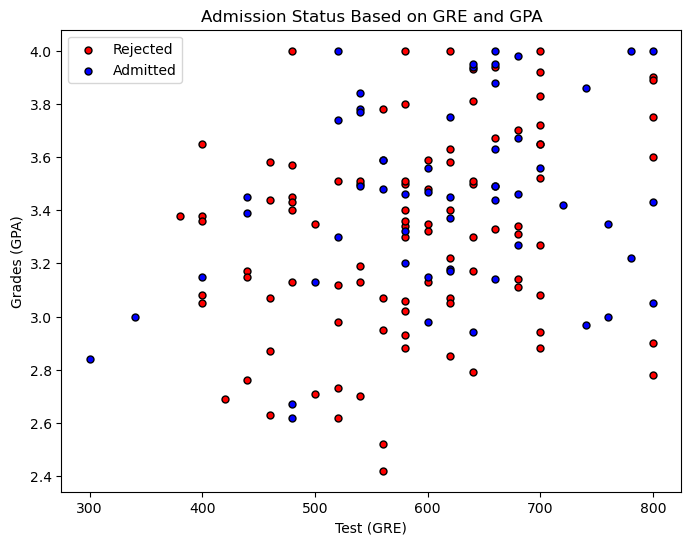

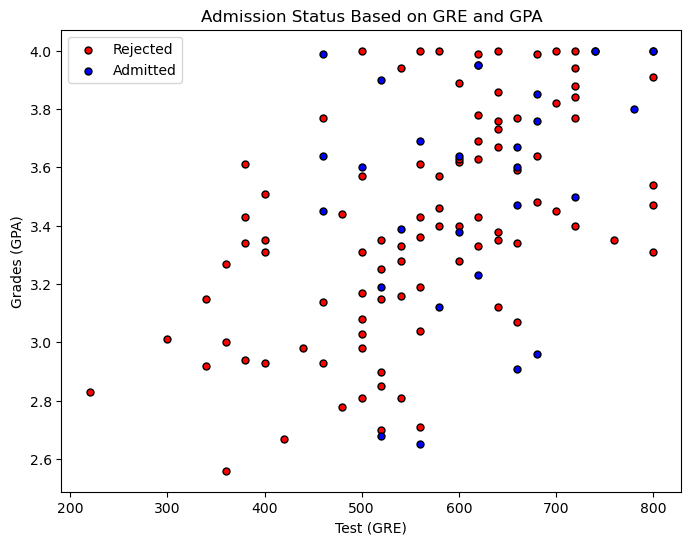

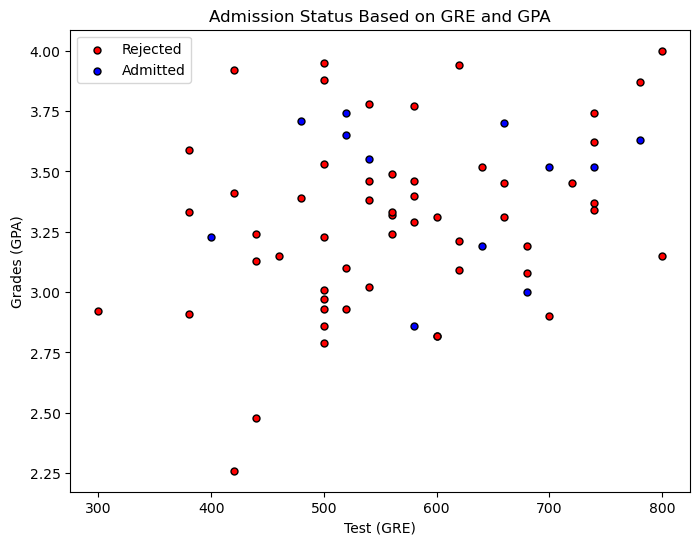

In [ ]:
import matplotlib.pyplot as plt

# Create a dictionary to store data for each rank, using descriptive names
data_by_rank = {
    "Rank 1": data[data["rank"] == 1],
    "Rank 2": data[data["rank"] == 2],
    "Rank 3": data[data["rank"] == 3],
    "Rank 4": data[data["rank"] == 4],
}

# print(data[data["rank"] == 1])

# Iterate through the ranks and plot the data
for rank_name, rank_data in data_by_rank.items():
    plot_points(rank_data)
    #plt.title(rank_name)
    plt.show()


In [ ]:
# implementing hot encoding for rank column

rank_dummies = pd.get_dummies(data['rank'], prefix='rank')

# Combine the original data with the one-hot encoded columns
hot_encoded_data = pd.concat([data, rank_dummies], axis=1)

# Drop the original 'rank' column
hot_encoded_data = hot_encoded_data.drop('rank', axis=1)

# Preview the first 5 rows
print(hot_encoded_data.head())  # Use head() for a clearer preview

   admit  gre   gpa  rank_1  rank_2  rank_3  rank_4
0      0  380  3.61       0       0       1       0
1      1  660  3.67       0       0       1       0
2      1  800  4.00       1       0       0       0
3      1  640  3.19       0       0       0       1
4      0  520  2.93       0       0       0       1
